In [4]:
!pip install rasterio
!pip install earthpy
!pip install rioxarray
!pip install geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 3.0 MB/s eta 0:00:00


In [6]:
import os

import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from rasterio.crs import CRS
import rioxarray as rxr
import earthpy as et

# Get data and set working directory
et.data.get_data("colorado-flood")
os.chdir(os.path.join(et.io.HOME,
                      'earth-analytics',
                      'data'))

Extracted output to /root/earth-analytics/data/colorado-flood/.


In [8]:
# Get data from Boulder Open Data portal
boulder_roads = gpd.read_file(
    "https://opendata.arcgis.com/datasets/5388d74deeb8450e8b0a45a542488ec8_0.geojson")

boulder_roads.crs


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

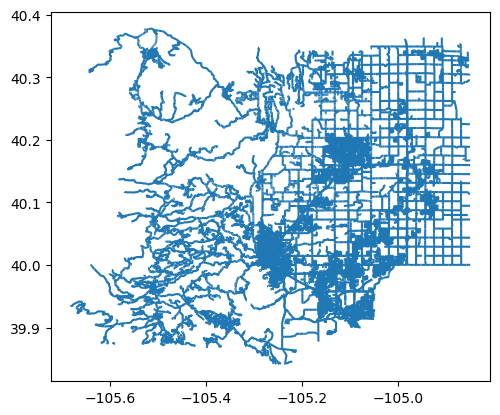

In [12]:
boulder_roads.plot()

In [9]:
# Open crop extent (your study area extent boundary)
crop_extent = gpd.read_file('/content/drive/MyDrive/python open source spatial programming and remote sensing/colarado_flood/spatial/boulder-leehill-rd/clip-extent.shp')
# Reproject the crop extent data to match the roads layer.
crop_extent_wgs84 = crop_extent.to_crs(boulder_roads.crs)

# Clip the buildings and roads to the extent of the study area using geopandas
roads_clip = gpd.clip(boulder_roads, crop_extent_wgs84)

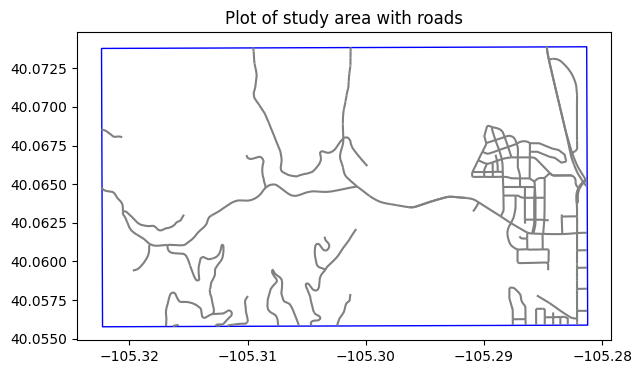

In [10]:
# Plot the clipped data
f, ax = plt.subplots(figsize=(10, 4))

crop_extent_wgs84.plot(ax=ax,
                       edgecolor="blue",
                       color="white")

roads_clip.plot(ax=ax,
                color="grey")
ax.set(title="Plot of study area with roads")
plt.show()

In [13]:
lidar_dem = rxr.open_rasterio('/content/drive/MyDrive/python open source spatial programming and remote sensing/colarado_flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif',
                              masked=True).squeeze()
# CHeck the CRS
lidar_dem.rio.crs

CRS.from_wkt('PROJCS["WGS 84 / UTM zone 13N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32613"]]')

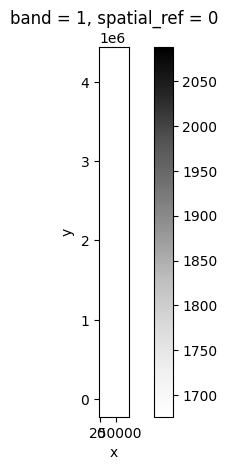

In [14]:
# When you try to overlay the building footprints the data don't line up
f, ax = plt.subplots()
lidar_dem.plot.imshow(ax=ax,
                      cmap='Greys')
roads_clip.plot(ax=ax)

plt.show()

In [15]:
# Reproject the data using the crs from the roads layer
lidar_dem_wgs84 = lidar_dem.rio.reproject(roads_clip.crs)
lidar_dem_wgs84.rio.crs

CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]')

In [16]:
# Reproject the data to another crs - 4326?

# Create a rasterio crs object for wgs 84 crs - lat / lon
crs_wgs84 = CRS.from_string('EPSG:4326')

# Reproject the data using the crs object
lidar_dem_wgs84_2 = lidar_dem.rio.reproject(crs_wgs84)
lidar_dem_wgs84_2.rio.crs

CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]')

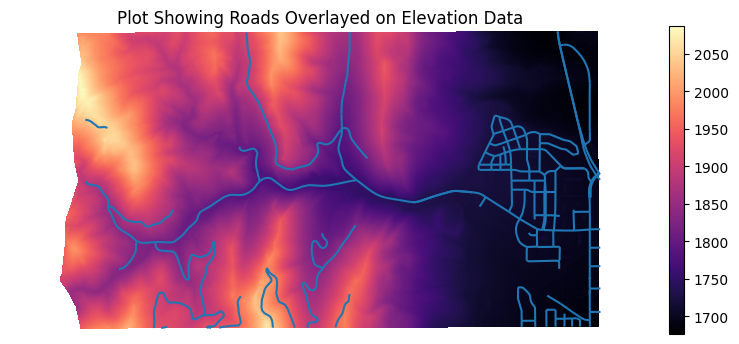

In [23]:
# Plot your newly converted data
f, ax = plt.subplots(figsize=(10, 4))

lidar_dem_wgs84.plot.imshow(ax=ax,
                            cmap='magma')
roads_clip.plot(ax=ax)
ax.set(title="Plot Showing Roads Overlayed on Elevation Data")
ax.set_axis_off()
plt.show()